# Lab 5: Fairness
Machine Learning 2025/2026

CSE Machine Learning Team

**WHAT** This nonmandatory lab consists of several programming tasks and pen-and-paper questions.

**WHY** The exercises are meant to help you learn about the concepts of fair machine learning models. 

**HOW** Follow the exercises in the notebook on your own. For questions and feedback please consult the TAs during the lab session. 

$\textbf{Exercise 1}$
During the lecture you learned about the training of fair machine learning models. Of course, assessing what is "fair" is difficult in itself and there exist over 20 definitions of ML fairness, many of them inherently conflicted. Nevertheless, it is a crucial topic to consider in machine learning tasks. Our models shouldn't only be highly performant (for example achieve high accuracy or F1-score) but also treat people in the same way regardless, for example, of their race or sex. In some cases such as [job recruitment][1] or [criminal justice system][2] unfair ML models may cause real harm to some people.

In this lab assignment you will have an opportunity to practice with machine learning fairness on a small dataset describing bank loans. Here, the task is to predict whether a person will be able to repay their loan; this information will be used to decide whether they should receive money from the bank or not. The variables in this dataset are:
* `y`: equal to 1 if the person could pay back the loan, otherwise 0.
* `r`: the race of the applicant; `r=1` is the minority race while `r=0` is the majority race. 
* `score`: the estimated probability whether someone can repay the loan. this probability is coming from a machine learning model trained by the bank. 

**Note:** Minority and majority race refer to their relative frequency in the general population, not necessarily in the dataset at hand.

We load the dataset below:

[1]: https://www.reuters.com/article/us-amazon-com-jobs-automation-insight-idUSKCN1MK08G
[2]: https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics

df = pd.read_csv('data/cc_data.csv')
loans = df.to_numpy()

df.head(n=5)

df

,y,r,score
0,0.0,1.0,0.360408
1,1.0,1.0,0.518166
2,0.0,1.0,0.120121
3,0.0,1.0,0.319551
4,1.0,0.0,0.972144
...,...,...,...
995,1.0,1.0,0.939782
996,1.0,1.0,0.168262
997,1.0,0.0,0.989434
998,1.0,1.0,0.876912


<div style="background-color:#c2eafa">

$\textbf{Question 1.1}$ Have a look at the data. How many people are from the majority race in this dataset?
    
</div>

In [18]:
minority, majority = None, None

# START ANSWER
minority = loans[loans[:, 1] == 1]
majority = loans[loans[:, 1] == 0]
# END ANSWER

print('Total dataset size: %d' % loans.shape[0])
print('Majority: %d' % majority.shape[0])
print('Minority: %d' % minority.shape[0])

Total dataset size: 1000
Majority: 486
Minority: 514


<div style="background-color:#c2eafa">

$\textbf{Question 1.2}$ What is the percentage of people from the majority race that could pay back their loan? What about the minority race?
    
</div>

In [19]:
minority_rate, majority_rate = 0, 0

# START ANSWER
minority_rate = np.mean(minority[:,0])
majority_rate = np.mean(majority[:,0])
# END ANSWER

print('%.2f of the majority race could pay back' % majority_rate)
print('%.2f of the minority race could pay back' % minority_rate)

0.91 of the majority race could pay back
0.70 of the minority race could pay back


In the following code block we will try out various thresholds for the score. For each threshold we will calculate the amount of people that will receive a loan from both races. The code for the majority race is already given. 

<div style="background-color:#c2eafa">

$\textbf{Question 1.3}$ Complete the code so that the minority race is added to the plot.
    
</div>

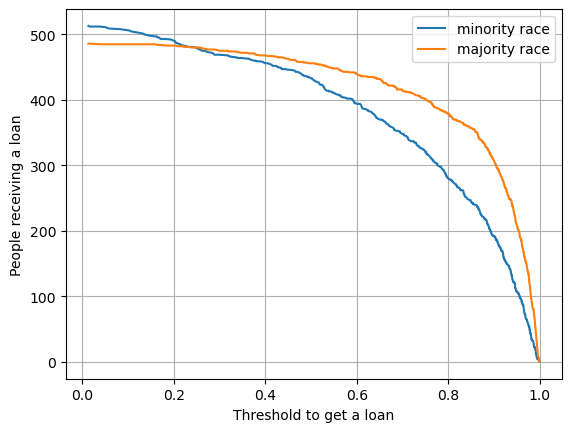

In [20]:
thresholds = np.unique(loans[:, 2])

num_accepted_minority = []
num_accepted_majority = []

for t in thresholds:
    accepted_majority = majority[majority[:, 2] > t]
    num_accepted_majority.append(accepted_majority.shape[0])
    
    # START ANSWER
    accepted_minority = minority[minority[:, 2] > t]
    num_accepted_minority.append(accepted_minority.shape[0])
    # END ANSWER

plt.figure()
plt.plot(thresholds, num_accepted_minority, label='minority race')
plt.plot(thresholds, num_accepted_majority, label='majority race')
plt.legend()
plt.xlabel('Threshold to get a loan')
plt.ylabel('People receiving a loan')
plt.grid()
plt.show()


The employees of the bank are quite confused by this plot. After all, they trained their machine learning model without the sensitive race attribute. Yet, the machine learning model seems to accept more people from the majority race than the minority race for most thresholds.  

<div style="background-color:#c2eafa">

$\textbf{Question 1.4}$ Explain how it is possible that generally the majority race receives higher scores than the majority race, while the machine learning model was not trained using the sensitive race attribute. 
**Hint:** the bank could have used attributes such as the age, zip code, education level, employment status of a person etc. Even though the race attribute was not used, can you think of situations in which one such attribute might be correlated with the race attribute? What would be the result of that?
    
</div>

[//]: # (START ANSWER)
the othe rfeatures that bitch was trained on are correlated to the race
  
[//]: # (END ANSWER)

With regard to fair machine learning models, we can distinguish three non-discrimination criteria: independence, separation, and sufficiency. You can read more about them [here](https://fairmlbook.org/classification.html), starting from the section on *Statistical non-discrimination criteria*.
    
For the remainder of this lab, we will have a look at the Independence criterion, as well as the Separation criterion.

To avoid any lawsuits regarding (positive or negative) discrimination, the bank is considering to use a single threshold for everyone. If some person receives a higher score than this threshold, this person is granted the loan. 

<div style="background-color:#c2eafa">

$\textbf{Question 1.5}$ If the bank wants to satisfy the Independence criterion what threshold should the bank use? In this example, the Independence criterion means that both races have roughly the same percentage of people getting a loan. So the race of a person and whether they are accepted for a loan are independent random variables (at least as independent as they can get in practice).
    
</div>

[//]: # (START ANSWER)
_Write your answer here._ 0.25

[//]: # (END ANSWER)

<div style="background-color:#c2eafa">

$\textbf{Question 1.6}$ For financial reasons the bank deems this threshold impractical. Explain why this is the case.
    
</div>

[//]: # (START ANSWER)
_Write your answer here._ because it ignores the actual repayment rates. this could lead to the bank lending out loans that are too risky

[//]: # (END ANSWER)

To make sure the bank stays profitable, the bank is considering to use two thresholds, one for the minority race and one for the majority race. 

<div style="background-color:#c2eafa">

$\textbf{Question 1.7}$ The bank wants to use a threshold of 90% for the majority race. What threshold should be used for the minority race to satisfy the Independence criterion?
    
</div>

[//]: # (START ANSWER)
_Write your answer here._ 0.9 for majority -> 300 people being accepted. so for 270 ppl from minority to be accepted we use acceptance rate of 0.78

[//]: # (END ANSWER)

As a final option, the bank is considering the Separation criterion. 

<div style="background-color:#c2eafa">

$\textbf{Question 1.8 (Optional})$ After consulting the previously linked material and working through the example here, can you explain why satisfying the Independence criterion might not always be desirable?
    
</div>

[//]: # (START ANSWER)
_Write your answer here._ because you dont want to take risky loans because you are ignoring the actual repayment rates and also having 2 different criterions could be legal trouble

[//]: # (END ANSWER)

Separation aims to make the rate of false positives and true positives equal for each race. In order to judge the Separation criterion, we will need to plot an ROC-curve.

<div style="background-color:#c2eafa">

$\textbf{Question 1.9}$ Complete the code below. It should draw 2 ROC curves - one for each race.  
**Hint:** We have imported [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) from the Scikit library for you.
    
</div>

/tmp/ipykernel_9789/3795633300.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


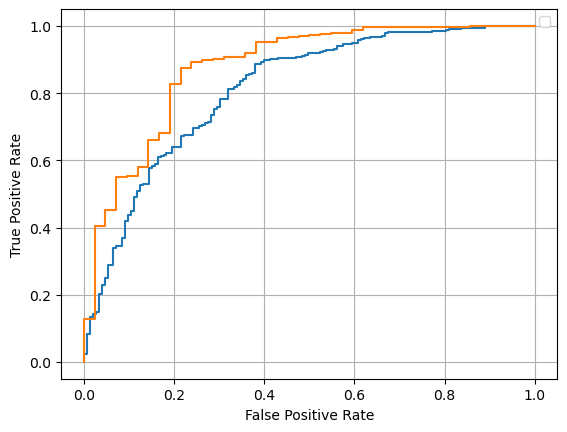

In [24]:
from sklearn.metrics import roc_curve

def plot_roc_curves(plot_minority=True, plot_majority=True):
    fpr_min, tpr_min, threshold_min = 0, 0, 0
    fpr_maj, tpr_maj, threshold_maj = 0, 0, 0

    # First calculate the FPR, TPR, and Thresholds for both races
    # START ANSWER
    fpr_min, tpr_min, threshold_min = roc_curve(minority[:,0], minority[:,2])
    fpr_maj, tpr_maj, threshold_maj = roc_curve(majority[:,0], majority[:,2])
    # END ANSWER

    if plot_minority:
        # Plot FPR against TPR for minority race
        # START ANSWER
        plt.plot(fpr_min, tpr_min)
        
        # END ANSWER
    
    if plot_majority:
        # Plot FPR against TPR for majority race
        # START ANSWER
        plt.plot(fpr_maj, tpr_maj)
        # END ANSWER

    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    return tpr_min, fpr_min, threshold_min, tpr_maj, fpr_maj, threshold_maj
    
tpr_min, fpr_min, threshold_min, tpr_maj, fpr_maj, threshold_maj = plot_roc_curves()
plt.show()

<div style="background-color:#c2eafa">

$\textbf{Question 1.10}$ Is there any point on the ROC curve that satisfies the Separation criterion? 
    
</div>

[//]: # (START ANSWER)
_Write your answer here._ yes, for 0.14 fpr and 0.575 tpr

[//]: # (END ANSWER)

<div style="background-color:#c2eafa">

$\textbf{Question 1.11}$ Run the code below to find the exact point which satisfies Separation criterion.
    
</div>

Minority: TPR 0.58 -- FPR 0.14 -- Threshold 0.87
Majority: TPR 0.58 -- FPR 0.14 -- Threshold 0.93


/tmp/ipykernel_9789/3795633300.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


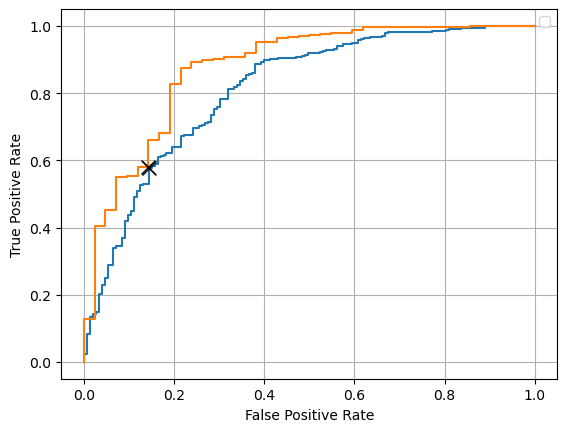

In [25]:
ind_min = 40
ind_maj = 13

print('Minority: TPR %.2f -- FPR %.2f -- Threshold %.2f' % (tpr_min[ind_min], fpr_min[ind_min], threshold_min[ind_min]))
print('Majority: TPR %.2f -- FPR %.2f -- Threshold %.2f' % (tpr_maj[ind_maj], fpr_maj[ind_maj], threshold_maj[ind_maj]))

plot_roc_curves() 
plt.plot(fpr_min[ind_min], tpr_min[ind_min], 'kx', markersize=10) # Minority race
plt.plot(fpr_maj[ind_maj], tpr_maj[ind_maj], 'kx', markersize=10) # Majority race

plt.show()

The bank is trying to find an alternative operating point where Separation also holds but both races achieve around 40% false positives. 

<div style="background-color:#c2eafa">

$\textbf{Question 1.12}$ Around the current point, the majority race achieves a true positive rate that is too high. Think about a way to adapt the classifier for the majority race to perform worse. 
    
</div>

[//]: # (START ANSWER)
_Write your answer here._ raise the threshold for the mojority race

[//]: # (END ANSWER)

The piece of code below will post-process the predictions of the majority race and plot an updated ROC curve. 

<div style="background-color:#c2eafa">

$\textbf{Question 1.13}$ Find a setting for the ``noise_magnitude`` such that we obtain a point around 40% false positives that satisfies the Separation criterion.
    
</div>

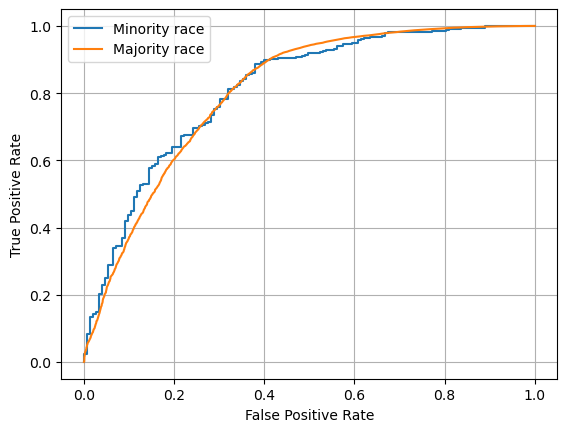

In [50]:
plt.figure()
plt.plot(fpr_min, tpr_min, label='Minority race')

noise_magnitude = 0.1

# Modify the value of noise_magnitude here
# START ANSWER
noise_magnitude = 0.65
# END ANSWER

fpr_maj_total = None
tpr_maj_total = None
threshold_maj_total = None

for rep in range(0, 100):
    noise = np.random.random(size=majority[:, 2].shape)
    y_score = majority[:, 2] + noise_magnitude * noise
    
    fpr_maj_noise, tpr_maj_noise, threshold_maj_noise = roc_curve(majority[:, 0], y_score, pos_label=1, drop_intermediate=False)
    fpr_maj_noise = fpr_maj_noise.reshape(-1, 1)
    tpr_maj_noise = tpr_maj_noise.reshape(-1, 1)
    threshold_maj_noise = threshold_maj_noise.reshape(-1, 1)
    
    if rep == 0:
        fpr_maj_total = fpr_maj_noise
        tpr_maj_total = tpr_maj_noise
        threshold_maj_total = threshold_maj_noise
    else:
        fpr_maj_total = np.concatenate((fpr_maj_total, fpr_maj_noise), axis=1)
        tpr_maj_total = np.concatenate((tpr_maj_total, tpr_maj_noise), axis=1)
        threshold_maj_total = np.concatenate((threshold_maj_total, threshold_maj_noise), axis=1) 
    
plt.plot(np.mean(fpr_maj_total, axis=1), np.mean(tpr_maj_total, axis=1), label='Majority race')  

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

<div style="background-color:#c2eafa">

$\textbf{Question 1.14}$ Use the piece of code below to find this exact point that satisfies Seperation.
    
</div>

Minority: TPR 0.90 -- FPR 0.41 -- Threshold 0.62
Majority: TPR 0.90 -- FPR 0.41 -- Threshold 0.95


/tmp/ipykernel_9789/3795633300.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


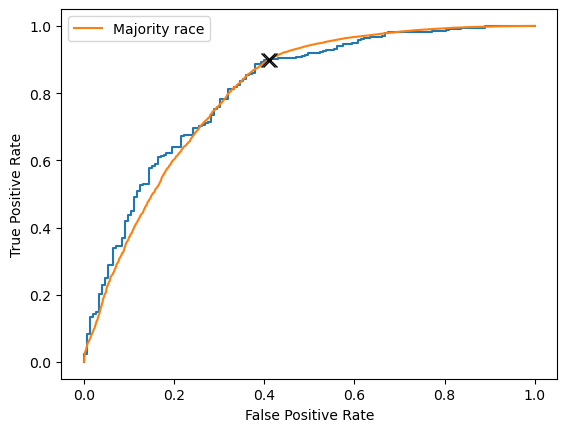

In [51]:
ind_min = 103
ind_maj = 416

tpr_maj_new = np.mean(tpr_maj_total, axis=1)
fpr_maj_new = np.mean(fpr_maj_total, axis=1)
threshold_maj_new = np.mean(threshold_maj_total, axis=1)

print('Minority: TPR %.2f -- FPR %.2f -- Threshold %.2f' % (tpr_min[ind_min], fpr_min[ind_min], threshold_min[ind_min]))
print('Majority: TPR %.2f -- FPR %.2f -- Threshold %.2f' % (tpr_maj_new[ind_maj], fpr_maj_new[ind_maj], threshold_maj_new[ind_maj]))

plt.figure()

plot_roc_curves(plot_majority=False) # Minority race
plt.plot(np.mean(fpr_maj_total, axis=1), np.mean(tpr_maj_total, axis=1), label='Majority race') # Majority race

plt.plot(fpr_min[ind_min], tpr_min[ind_min], 'kx', markersize=10)
plt.plot(fpr_maj_new[ind_maj], tpr_maj_new[ind_maj], 'kx', markersize=10)

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

The bank has determined that the cost of a false-positive error is approximately 700 euros, while the cost of a false-negative error is around 100 euro.

<div style="background-color:#c2eafa">

$\textbf{Question 1.15}$ Explain why the cost of a False Positive result may be higher than the cost of a False Negative. Think about this from the perspective of the bank.
    
</div>

[//]: # (START ANSWER)
_Write your answer here._ worse to give out a risky loan bc you lose more money than not giving a safe loan

[//]: # (END ANSWER)

So far we have determined 4 possible options for the bank:
* a single threshold where Independence holds
* two thresholds, one per race, so that Independence holds
* two thresholds, one per race, so that Seperation holds around a True Positive Rate of around 60%
* two thresholds, one per race, so that Seperation holds around a False Positive Rate of around 40%. 

In the last case, it was necessary to post-process the predictions of the majority race. 

<div style="background-color:#c2eafa">

$\textbf{Question 1.16}$ Finish the functions `cost` and `cost_noise` given below.  
**Hint:** Investigate the documentation of [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function.
    
</div>

In [43]:
from sklearn.metrics import confusion_matrix

def cost(dataset, threshold):
    cm = confusion_matrix(dataset[:, 0], (dataset[:, 2] > threshold) * 1.0)
    cost = 0
    
    # First, extract FPs and FNs from the confusion matrix, then calculate the associated cost of the threshold
    # START ANSWER
    tp, fp, fn, tn = cm.ravel()
    cost = fp * 700 + fn * 100
    # END ANSWER
    
    return cost

def cost_noise(dataset, threshold, noise_magnitude):
    noise = np.random.random(size=majority[:, 2].shape)
    
    total_cost = []
    for rep in range(0, 1000):
        cm = confusion_matrix(dataset[:, 0], (dataset[:, 2] + noise_magnitude * noise > threshold) * 1.0, labels=[1, 0])

        # First, extract FPs and FNs from the confusion matrix, then calculate the associated cost of the threshold
        # START ANSWER
        tp, fp, fn, tn = cm.ravel()
        cost = fp * 700 + fn * 100
        # END ANSWER
        
        total_cost.append(cost)
        
    total_cost = np.array(total_cost)
    return np.mean(total_cost)

<div style="background-color:#c2eafa">

$\textbf{Question 1.17}$ Complete the code below. It should compute the costs of all 4 options for the bank.
    
</div>

In [52]:
cost_single_independence = 0
cost_two_independence = 0
cost_seperation = 0
cost_seperation_noise = 0

# Single threshold of 0.2
# START ANSWER
cost_single_independence = cost(loans, 0.2)
# END ANSWER
print('Cost of a single threshold -- Independence:     ', cost_single_independence)

# Two thresholds 
# START ANSWER
cost_two_independence = cost(majority, 0.9) + cost(minority, 0.78)
# END ANSWER
print('Cost of two thresholds -- Independence:         ', cost_two_independence)

# Seperation
# START ANSWER
cost_seperation = cost(majority, 0.93) + cost(minority, 0.87)
# END ANSWER
print('Cost of two thresholds -- Seperation:           ', cost_seperation)

# Seperation with noise
# START ANSWER
cost_seperation_noise = cost(majority, 0.95) + cost(minority, 0.62)
# END ANSWER
print('Cost of two thresholds with noise -- Seperation:', int(cost_seperation_noise))

Cost of a single threshold -- Independence:      119900
Cost of two thresholds -- Independence:          59100
Cost of two thresholds -- Seperation:            54000
Cost of two thresholds with noise -- Seperation: 73000


<div style="background-color:#c2eafa">

$\textbf{Question 1.18}$ Explain why the cost for a single threshold for the Independence criterion is so high.
    
</div>

[//]: # (START ANSWER)
_Write your answer here._ bc you are not looking at the motherfucking prediction rates or whatever

[//]: # (END ANSWER)

$\textbf{Exercise 2}$ Finally, we would like you to think critically about the usage of protected attributes (such as race or sex) in the training of ML models. Of course, since these questions touch on ethical issues there isn't necessarily one correct answer, however, it is important to consider these in context of fair models.

<div style="background-color:#c2eafa">

$\textbf{Question 2.1}$ Are there any risks associated with removing protected attributes from the dataset? If so, what are they?
    
</div>

[//]: # (START ANSWER)
_Write your answer here._ yes

[//]: # (END ANSWER)

<div style="background-color:#c2eafa">

$\textbf{Question 2.2}$ Sometimes, an unprotected attribute may be very strongly correlated with a protected attribute (this is called redlining). Give an example of the redlining effect.
    
</div>

[//]: # (START ANSWER)
_Write your answer here._ credit score -> zip code -> racost

[//]: # (END ANSWER)

Now, think about the following two machine learning tasks:
* We want to predict whether a given person makes over 100000 euros at their current job.
* We want to predict whether a given person should make over 100000 euros at their new job.

<div style="background-color:#c2eafa">

$\textbf{Question 2.3}$ Explain in your own words how these two tasks differ.
    
</div>

[//]: # (START ANSWER)
_Write your answer here._ i dont care

[//]: # (END ANSWER)

<div style="background-color:#c2eafa">

$\textbf{Question 2.4}$ Would protected attributes be useful in either of these tasks? Should we use them?
    
</div>

[//]: # (START ANSWER)
_Write your answer here._ i dont care

[//]: # (END ANSWER)

<div style="background-color:#c2eafa">

$\textbf{Question 2.5}$ Bias is defined as the "inclination or prejudice for or against one person or group, especially in a way considered to be unfair". Give two possible sources of bias in machine learning algorithms.
    
</div>

[//]: # (START ANSWER)
_Write your answer here._ i dont care

[//]: # (END ANSWER)